In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

#### Note that all biological rates (e.g., grazing) are scaled (multiplied by 1.111) to correct for a time splitting/Roberts-Asselin filter error in hte model as reported in Olson et al. 2020

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

# Load files from monthly averages

## Z1 grazing on Diatoms

In [3]:
#years, months, data
monthly_array_Z1diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZDIAT']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2015,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z1diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
# Loop through years for wrap files
for year in [2013,2014]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
         # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z1diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    
    
    
    
    
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]









In [4]:
monthly_array_Z1diatoms_depthint_slice=np.where(np.isnan(monthly_array_Z1diatoms_depthint_slice), 0, monthly_array_Z1diatoms_depthint_slice)
monthly_array_Z1diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_Z1diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_Z1diatoms_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [5]:
#2008, 2010, 2011, 2012
NPGO_C_Z1diat=np.array([[monthly_array_Z1diatoms_depthint_slicemean[1,:]],[monthly_array_Z1diatoms_depthint_slicemean[3,:]],\
        [monthly_array_Z1diatoms_depthint_slicemean[4,:]],[monthly_array_Z1diatoms_depthint_slicemean[5,:]]])

In [6]:
NPGO_C_Z1diat_mean=NPGO_C_Z1diat.mean(axis=0).flatten()*86400*1.111

In [7]:
NPGO_C_Z1diat_std=NPGO_C_Z1diat.std(axis=0).flatten()*86400*1.111

In [8]:
#2015, 2018, 2019, 2020
NPGO_W_Z1diat=np.array([[monthly_array_Z1diatoms_depthint_slicemean[8,:]],[monthly_array_Z1diatoms_depthint_slicemean[11,:]],\
        [monthly_array_Z1diatoms_depthint_slicemean[12,:]],[monthly_array_Z1diatoms_depthint_slicemean[13,:]]])


In [9]:
NPGO_W_Z1diat_mean=NPGO_W_Z1diat.mean(axis=0).flatten()*86400*1.111

In [10]:
NPGO_W_Z1diat_std=NPGO_W_Z1diat.std(axis=0).flatten()*86400*1.111

In [11]:
NPGO_C_Z1diat_mean.max()

5.853982189725535

In [12]:
NPGO_W_Z1diat_mean.max()

6.757904071950235

# Load files from monthly averages

## Z1 grazing on Nanoflagellates

In [13]:

#years, months, data
monthly_array_Z1flag_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZPHY']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2015,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z1flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
# Loop through years for wrap files
for year in [2013,2014]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z1flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    
    
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]







In [14]:
monthly_array_Z1flag_depthint_slice[monthly_array_Z1flag_depthint_slice == 0 ] = np.nan
monthly_array_Z1flag_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_Z1flag_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_Z1flag_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [15]:
#2008, 2010, 2011, 2012
NPGO_C_Z1flag=np.array([[monthly_array_Z1flag_depthint_slicemean[1,:]],[monthly_array_Z1flag_depthint_slicemean[3,:]],\
        [monthly_array_Z1flag_depthint_slicemean[4,:]],[monthly_array_Z1flag_depthint_slicemean[5,:]]])

In [16]:
NPGO_C_Z1flag_mean=NPGO_C_Z1flag.mean(axis=0).flatten()*86400*1.111

In [17]:
NPGO_C_Z1flag_std=NPGO_C_Z1flag.std(axis=0).flatten()*86400*1.111

In [18]:
#2015, 2018, 2019, 2020
NPGO_W_Z1flag=np.array([[monthly_array_Z1flag_depthint_slicemean[8,:]],[monthly_array_Z1flag_depthint_slicemean[11,:]],\
        [monthly_array_Z1flag_depthint_slicemean[12,:]],[monthly_array_Z1flag_depthint_slicemean[13,:]]])


In [19]:
NPGO_W_Z1flag_mean=NPGO_W_Z1flag.mean(axis=0).flatten()*86400*1.111

In [20]:
NPGO_W_Z1flag_std=NPGO_W_Z1flag.std(axis=0).flatten()*86400*1.111

In [21]:
NPGO_C_Z1flag_mean.max()

5.543413180928081

In [22]:
NPGO_W_Z1flag_mean.max()

6.664183563148394

#### Z1 Grazing on both diatoms and nanoflagelles for Cold Years

In [23]:
NPGO_C_Z1Both=NPGO_C_Z1diat_mean+NPGO_C_Z1flag_mean

In [24]:
NPGO_C_Z1Both

array([0.10268752, 0.42718894, 1.05655672, 4.58719945, 6.87334479,
       7.61734177, 8.85194247, 6.29357942, 3.35244758, 0.56951175,
       0.11327659, 0.08977801])

In [25]:
#### Z1 Grazing on both diatoms and nanoflagelles for Warm Years

In [26]:
NPGO_W_Z1Both=NPGO_W_Z1diat_mean+NPGO_W_Z1flag_mean

In [27]:
NPGO_W_Z1Both

array([0.14284651, 0.52294073, 3.93385487, 7.52276735, 6.2666193 ,
       7.42655869, 7.66459905, 6.1478577 , 2.3778494 , 0.37108638,
       0.14533633, 0.07999317])

In [28]:
NPGO_C_Z1Both.mean()

3.3279045835973626

In [29]:
NPGO_W_Z1Both.mean()

3.5501924577589943

### Load monthly average files for Z1 biomass

In [30]:


#years, months, data
monthly_array_microzooplankton_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['microzooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_microzooplankton_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['microzooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_microzooplankton_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['microzooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)      
        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]




In [31]:
monthly_array_microzooplankton_depthint_slice[monthly_array_microzooplankton_depthint_slice == 0 ] = np.nan
monthly_array_microzooplankton_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_microzooplankton_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_microzooplankton_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [32]:
#2008, 2010, 2011, 2012
NPGO_C_micro=np.array([[monthly_array_microzooplankton_depthint_slicemean[1,:]],[monthly_array_microzooplankton_depthint_slicemean[3,:]],\
        [monthly_array_microzooplankton_depthint_slicemean[4,:]],[monthly_array_microzooplankton_depthint_slicemean[5,:]]])

In [33]:
NPGO_C_micro_mean=NPGO_C_micro.mean(axis=0).flatten()*5.7*12/1000

In [34]:
NPGO_C_micro_std=NPGO_C_micro.std(axis=0).flatten()*5.7*12/1000

In [35]:
#2015, 2018, 2019, 2020
NPGO_W_micro=np.array([[monthly_array_microzooplankton_depthint_slicemean[8,:]],[monthly_array_microzooplankton_depthint_slicemean[11,:]],\
        [monthly_array_microzooplankton_depthint_slicemean[12,:]],[monthly_array_microzooplankton_depthint_slicemean[13,:]]])


In [36]:
NPGO_W_micro_mean=NPGO_W_micro.mean(axis=0).flatten()*5.7*12/1000

In [37]:
NPGO_W_micro_std=NPGO_W_micro.std(axis=0).flatten()*5.7*12/1000

Text(0.5, 1.0, 'Cold Years')

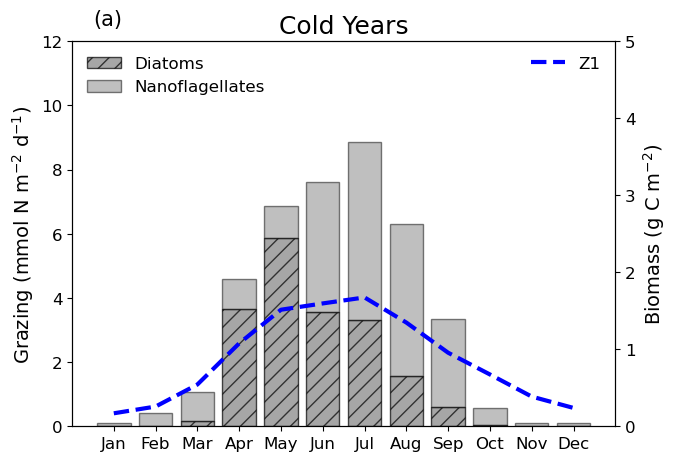

In [38]:
## Plot Figure 4a

fig, ax = plt.subplots(figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax2=ax.twinx()

ax2.plot(xticks, NPGO_C_micro_mean,label='Z1',color='b',linestyle='--',linewidth=3)


ax.bar(xticks,NPGO_C_Z1diat_mean,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax.bar(xticks,NPGO_C_Z1flag_mean,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_C_Z1diat_mean)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax.legend(frameon=False,loc=2)
ax2.legend(frameon=False,loc=1)
ax.set_ylim(0,12)
ax.set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax.set_xlabel('',fontsize=14)
#ax.tick_params(axis='x', labelrotation=0)

ax.text(-.5, 12.5, '(a)', fontsize=15,  color='k')

ax.set_title('Cold Years',fontsize=18)

#plt.savefig('Fig6a.png', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 1.0, 'Warm Years')

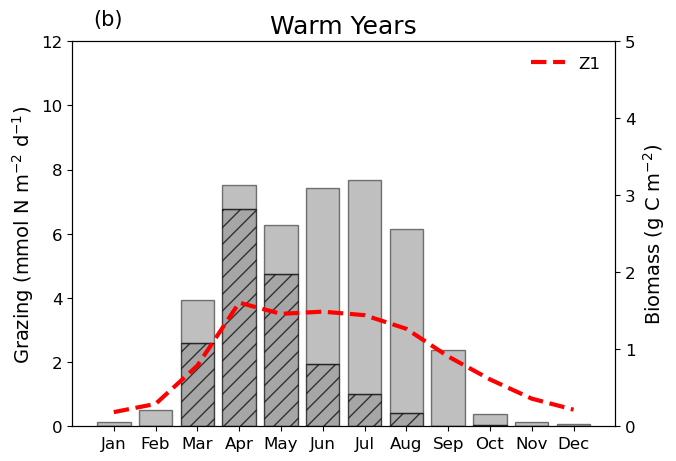

In [39]:
## Plot Figure 4b

fig, ax = plt.subplots(figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax2=ax.twinx()

ax2.plot(xticks, NPGO_W_micro_mean,label='Z1',color='r',linestyle='--',linewidth=3)


ax.bar(xticks,NPGO_W_Z1diat_mean,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax.bar(xticks,NPGO_W_Z1flag_mean,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_W_Z1diat_mean)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax2.legend(frameon=False,loc=1)
ax.set_ylim(0,12)
ax.set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax.set_xlabel('',fontsize=14)

#ax.tick_params(axis='x', labelrotation=0)
ax.text(-.5, 12.5, '(b)', fontsize=15,  color='k')

ax.set_title('Warm Years',fontsize=18)

#plt.savefig('Fig6b.png', bbox_inches='tight',dpi=1000,transparent=False)

## Z2 grazing on Diatoms

In [40]:
#years, months, data
monthly_array_Z2diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMESZDIAT']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2015,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z2diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMESZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
# Loop through years for wrap files
for year in [2013,2014]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z2diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMESZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

    
    
    
    
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]






In [41]:
monthly_array_Z2diatoms_depthint_slice[monthly_array_Z2diatoms_depthint_slice == 0 ] = np.nan
monthly_array_Z2diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_Z2diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_Z2diatoms_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [42]:
#2008, 2010, 2011, 2012
NPGO_C_Z2diat=np.array([[monthly_array_Z2diatoms_depthint_slicemean[1,:]],[monthly_array_Z2diatoms_depthint_slicemean[3,:]],\
        [monthly_array_Z2diatoms_depthint_slicemean[4,:]],[monthly_array_Z2diatoms_depthint_slicemean[5,:]]])

In [43]:
NPGO_C_Z2diat_mean=NPGO_C_Z2diat.mean(axis=0).flatten()*86400*1.111

In [44]:
NPGO_C_Z2diat_std=NPGO_C_Z2diat.std(axis=0).flatten()*86400*1.111

In [45]:
#2015, 2018, 2019, 2020
NPGO_W_Z2diat=np.array([[monthly_array_Z2diatoms_depthint_slicemean[8,:]],[monthly_array_Z2diatoms_depthint_slicemean[11,:]],\
        [monthly_array_Z2diatoms_depthint_slicemean[12,:]],[monthly_array_Z2diatoms_depthint_slicemean[13,:]]])


In [46]:
NPGO_W_Z2diat_mean=NPGO_W_Z2diat.mean(axis=0).flatten()*86400*1.111

In [47]:
NPGO_W_Z2diat_std=NPGO_W_Z2diat.std(axis=0).flatten()*86400*1.111

In [48]:
NPGO_C_Z2diat_mean.max()

10.04984063299166

In [49]:
NPGO_W_Z2diat_mean.max()

7.914635270032661

## Z2 grazing on Nanoflagellates

In [50]:

#years, months, data
monthly_array_Z2flag_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMESZPHY']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2015,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z2flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMESZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
# Loop through years for wrap files
for year in [2013,2014]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z2flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMESZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]





In [51]:
monthly_array_Z2flag_depthint_slice[monthly_array_Z2flag_depthint_slice == 0 ] = np.nan
monthly_array_Z2flag_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_Z2flag_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_Z2flag_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [52]:
#2008, 2010, 2011, 2012
NPGO_C_Z2flag=np.array([[monthly_array_Z2flag_depthint_slicemean[1,:]],[monthly_array_Z2flag_depthint_slicemean[3,:]],\
        [monthly_array_Z2flag_depthint_slicemean[4,:]],[monthly_array_Z2flag_depthint_slicemean[5,:]]])

In [53]:
NPGO_C_Z2flag_mean=NPGO_C_Z2flag.mean(axis=0).flatten()*86400*1.111

In [54]:
NPGO_C_Z2flag_std=NPGO_C_Z2flag.std(axis=0).flatten()*86400*1.111

In [55]:
#2015, 2018, 2019, 2020
NPGO_W_Z2flag=np.array([[monthly_array_Z2flag_depthint_slicemean[8,:]],[monthly_array_Z2flag_depthint_slicemean[11,:]],\
        [monthly_array_Z2flag_depthint_slicemean[12,:]],[monthly_array_Z2flag_depthint_slicemean[13,:]]])


In [56]:
NPGO_W_Z2flag_mean=NPGO_W_Z2flag.mean(axis=0).flatten()*86400*1.111

In [57]:
NPGO_W_Z2flag_std=NPGO_W_Z2flag.std(axis=0).flatten()*86400*1.111

In [58]:
NPGO_C_Z2flag_mean.max()

4.57174370398066

In [59]:
NPGO_W_Z2flag_mean.max()

6.748131637343641

#### Z2 Grazing on both diatoms and nanoflagelles for Cold Years

In [60]:
NPGO_C_Z2Both=NPGO_C_Z2diat_mean+NPGO_C_Z2flag_mean

In [61]:
NPGO_C_Z2Both

array([ 0.40363747,  0.76335678,  1.57293094,  8.17927261, 10.74823302,
        8.98512417,  7.51202381,  7.47978546,  6.9654041 ,  1.55658343,
        0.41548779,  0.29453213])

#### Z2 Grazing on both diatoms and nanoflagelles for Warm Years

In [62]:
NPGO_W_Z2Both=NPGO_W_Z2diat_mean+NPGO_W_Z2flag_mean

In [63]:
NPGO_W_Z2Both

array([0.4195334 , 0.81169948, 4.04578856, 7.94181399, 8.96287137,
       7.89249682, 7.91523199, 8.0897084 , 4.56273968, 1.08587646,
       0.57738917, 0.28770183])

In [64]:
NPGO_C_Z2Both.mean()

4.573030975739248

In [65]:
NPGO_W_Z2Both.mean()

4.382737596046964

### Load monthly average files for Z2 biomass

In [66]:


#years, months, data
monthly_array_mesozooplankton_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['mesozooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_mesozooplankton_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_mesozooplankton_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)      
        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]




In [67]:
monthly_array_mesozooplankton_depthint_slice[monthly_array_mesozooplankton_depthint_slice == 0 ] = np.nan
monthly_array_mesozooplankton_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_mesozooplankton_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_mesozooplankton_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [68]:
#2008, 2010, 2011, 2012
NPGO_C_meso=np.array([[monthly_array_mesozooplankton_depthint_slicemean[1,:]],[monthly_array_mesozooplankton_depthint_slicemean[3,:]],\
        [monthly_array_mesozooplankton_depthint_slicemean[4,:]],[monthly_array_mesozooplankton_depthint_slicemean[5,:]]])

In [69]:
NPGO_C_meso_mean=NPGO_C_meso.mean(axis=0).flatten()*5.7*12/1000

In [70]:
NPGO_C_meso_std=NPGO_C_meso.std(axis=0).flatten()*5.7*12/1000

In [71]:
#2015, 2018, 2019, 2020
NPGO_W_meso=np.array([[monthly_array_mesozooplankton_depthint_slicemean[8,:]],[monthly_array_mesozooplankton_depthint_slicemean[11,:]],\
        [monthly_array_mesozooplankton_depthint_slicemean[12,:]],[monthly_array_mesozooplankton_depthint_slicemean[13,:]]])


In [72]:
NPGO_W_meso_mean=NPGO_W_meso.mean(axis=0).flatten()*5.7*12/1000

In [73]:
NPGO_W_meso_std=NPGO_W_meso.std(axis=0).flatten()*5.7*12/1000

Text(0.5, 1.0, '')

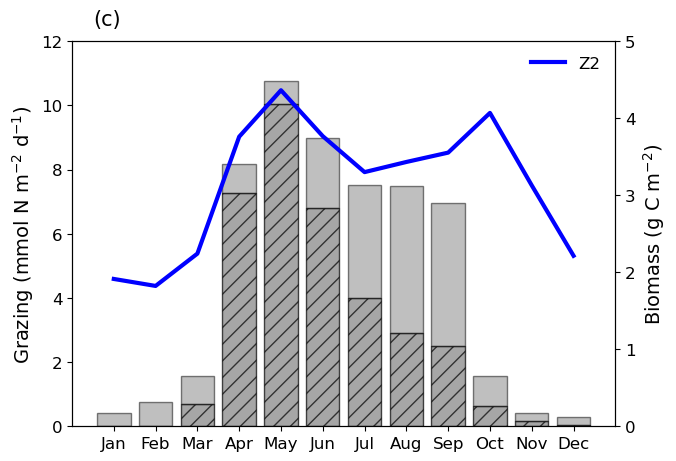

In [74]:
### Plot Figure 6C

fig, ax = plt.subplots(figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax2=ax.twinx()

ax2.plot(xticks, NPGO_C_meso_mean,label='Z2',color='b',linewidth=3)

ax.bar(xticks,NPGO_C_Z2diat_mean,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax.bar(xticks,NPGO_C_Z2flag_mean,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_C_Z2diat_mean)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

#ax.legend(frameon=False,loc=2)
ax2.legend(frameon=False,loc=1)
ax.set_ylim(0,12)
ax.set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax.set_xlabel('',fontsize=14)
#ax.tick_params(axis='x', labelrotation=0)

ax.text(-.5, 12.5, '(c)', fontsize=15,  color='k')

ax.set_title('',fontsize=18)

#plt.savefig('Fig6c.png', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 1.0, '')

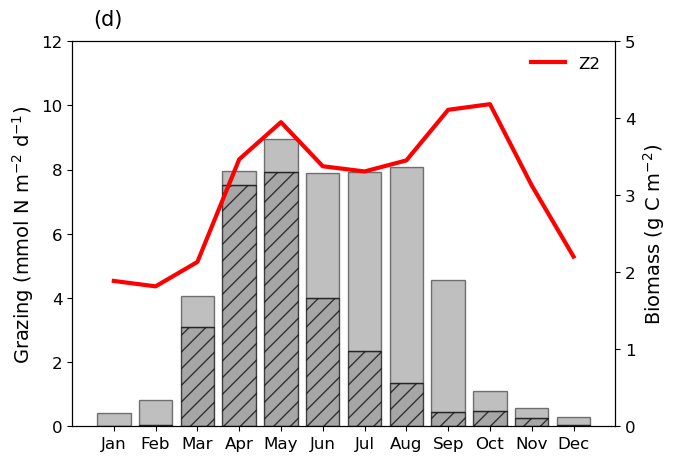

In [75]:
### Plot Figure 6d


fig, ax = plt.subplots(figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax2=ax.twinx()

ax2.plot(xticks, NPGO_W_meso_mean,label='Z2',color='r',linestyle='-',linewidth=3)


ax.bar(xticks,NPGO_W_Z2diat_mean,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax.bar(xticks,NPGO_W_Z2flag_mean,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_W_Z2diat_mean)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax2.legend(frameon=False,loc=1)
ax.set_ylim(0,12)
ax.set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax.set_xlabel('',fontsize=14)

#ax.tick_params(axis='x', labelrotation=0)
ax.text(-.5, 12.5, '(d)', fontsize=15,  color='k')
ax.set_title('',fontsize=18)

#plt.savefig('Fig6d.png', bbox_inches='tight',dpi=1000,transparent=False)

### Plot all on one figure

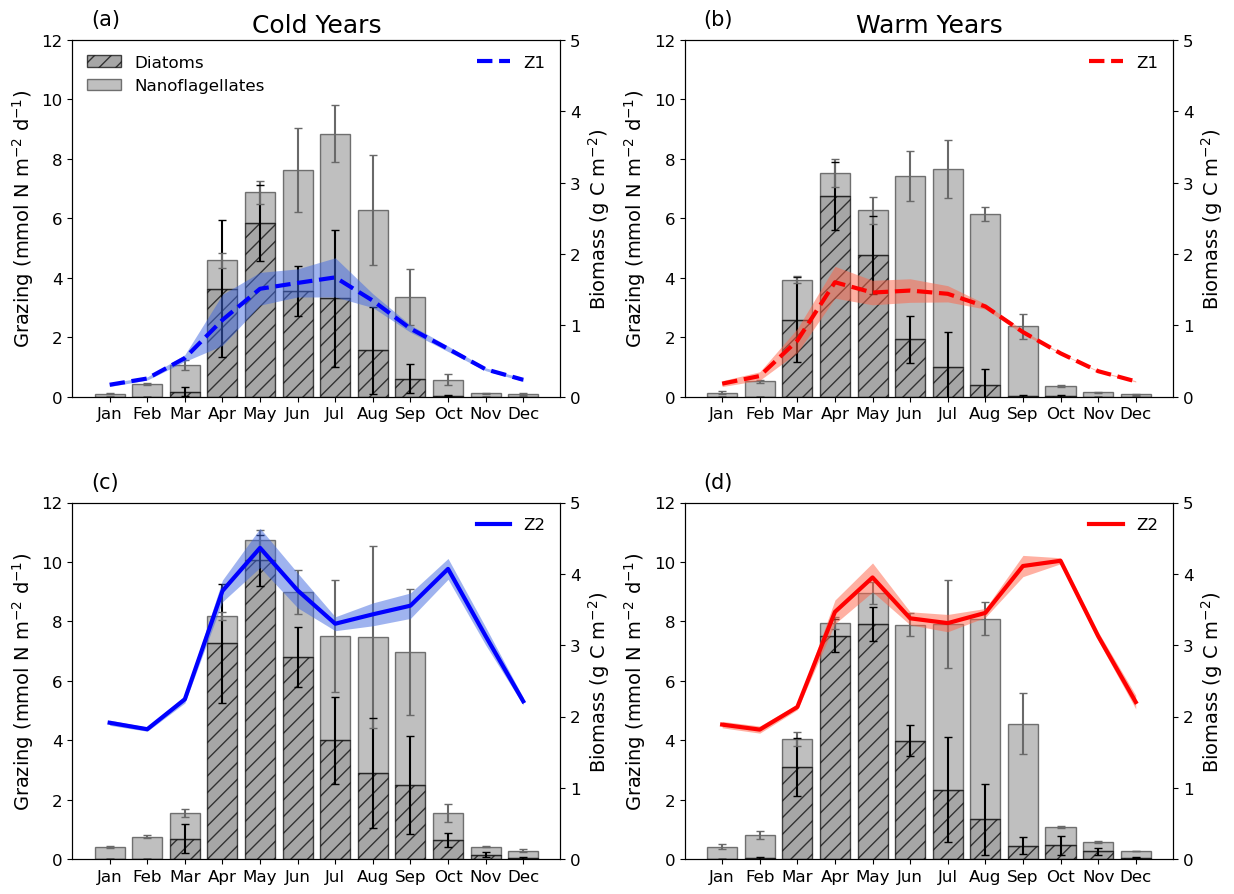

In [116]:

fig, ax = plt.subplots(2,2,figsize=(13,10))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

fig.tight_layout(pad=4.5)


### PLOT FOR Z1 COLD YEARS

ax2 = ax[0,0].twinx()

ax2.errorbar(xticks, NPGO_C_micro_mean,label='Z1',color='b',linestyle='--',linewidth=3)
ax2.fill_between(xticks, NPGO_C_micro_mean-NPGO_C_micro_std, NPGO_C_micro_mean+NPGO_C_micro_std,
    alpha=0.5, edgecolor='royalblue', facecolor='royalblue',
    linewidth=0)

ax[0,0].bar(xticks,NPGO_C_Z1diat_mean,yerr=NPGO_C_Z1diat_std,color='grey',capsize=3,edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax[0,0].bar(xticks,NPGO_C_Z1flag_mean,yerr=NPGO_C_Z1flag_std,color='grey',ecolor='dimgrey',capsize=3,edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_C_Z1diat_mean)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax[0,0].legend(frameon=False,loc=2)
ax2.legend(frameon=False,loc=1)
ax[0,0].set_ylim(0,12)
ax[0,0].set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax[0,0].set_xlabel('',fontsize=14)
#ax.tick_params(axis='x', labelrotation=0)

ax[0,0].text(-.5, 12.5, '(a)', fontsize=15,  color='k')

ax[0,0].set_title('Cold Years',fontsize=18)


### PLOT FOR Z1 WARM YEARS
ax3=ax[0,1].twinx()

ax3.errorbar(xticks, NPGO_W_micro_mean,label='Z1',color='r',linestyle='--',linewidth=3)
ax3.fill_between(xticks, NPGO_W_micro_mean-NPGO_W_micro_std, NPGO_W_micro_mean+NPGO_W_micro_std,
    alpha=0.5, edgecolor='tomato', facecolor='tomato',
    linewidth=0)

ax[0,1].bar(xticks,NPGO_W_Z1diat_mean,yerr=NPGO_W_Z1diat_std,color='grey',capsize=3,edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax[0,1].bar(xticks,NPGO_W_Z1flag_mean,yerr=NPGO_W_Z1flag_std,color='grey',ecolor='dimgrey',capsize=3,edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_W_Z1diat_mean)



ax3.set_ylim(0,5)
ax3.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax3.legend(frameon=False,loc=1)
ax[0,1].set_ylim(0,12)
ax[0,1].set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax[0,1].set_xlabel('',fontsize=14)

#ax.tick_params(axis='x', labelrotation=0)
ax[0,1].text(-.5, 12.5, '(b)', fontsize=15,  color='k')

ax[0,1].set_title('Warm Years',fontsize=18)



### PLOT FOR Z2 COLD YEARS
ax4=ax[1,0].twinx()

ax4.errorbar(xticks, NPGO_C_meso_mean,label='Z2',color='b',linewidth=3)
ax4.fill_between(xticks, NPGO_C_meso_mean-NPGO_C_meso_std, NPGO_C_meso_mean+NPGO_C_meso_std,
    alpha=0.5, edgecolor='royalblue', facecolor='royalblue',
    linewidth=0)
ax[1,0].bar(xticks,NPGO_C_Z2diat_mean,yerr=NPGO_C_Z2diat_std,color='grey',edgecolor='k',capsize=3,hatch='//',alpha=0.7,label='Diatoms')
ax[1,0].bar(xticks,NPGO_C_Z2flag_mean,yerr=NPGO_C_Z2flag_std,color='grey',edgecolor='k',ecolor='dimgrey',capsize=3,label='Nanoflagellates',alpha=0.5,bottom=NPGO_C_Z2diat_mean)



ax4.set_ylim(0,5)
ax4.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

#ax.legend(frameon=False,loc=2)
ax4.legend(frameon=False,loc=1)
ax[1,0].set_ylim(0,12)
ax[1,0].set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax[1,0].set_xlabel('',fontsize=14)
#ax.tick_params(axis='x', labelrotation=0)

ax[1,0].text(-.5, 12.5, '(c)', fontsize=15,  color='k')

ax[1,0].set_title('',fontsize=18)


### PLOT FOR Z2 WARM YEARS
ax5=ax[1,1].twinx()

ax5.errorbar(xticks, NPGO_W_meso_mean,label='Z2',color='r',linestyle='-',linewidth=3)
ax5.fill_between(xticks, NPGO_W_meso_mean-NPGO_W_meso_std, NPGO_W_meso_mean+NPGO_W_meso_std,
    alpha=0.5, edgecolor='tomato', facecolor='tomato',
    linewidth=0)

ax[1,1].bar(xticks,NPGO_W_Z2diat_mean,yerr=NPGO_W_Z2diat_std,color='grey',edgecolor='k',capsize=3,hatch='//',alpha=0.7,label='Diatoms')
ax[1,1].bar(xticks,NPGO_W_Z2flag_mean,yerr=NPGO_W_Z2flag_std,color='grey',ecolor='dimgrey',capsize=3,edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_W_Z2diat_mean)



ax5.set_ylim(0,5)
ax5.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax5.legend(frameon=False,loc=1)
ax[1,1].set_ylim(0,12)
ax[1,1].set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax[1,1].set_xlabel('',fontsize=14)

#ax.tick_params(axis='x', labelrotation=0)
ax[1,1].text(-.5, 12.5, '(d)', fontsize=15,  color='k')
ax[1,1].set_title('',fontsize=18)

#plt.savefig('Figure10_ZooplanktonGrazing_revised.png', bbox_inches='tight',dpi=1000,transparent=False)
